Importa as bibliotecas necessárias:

In [11]:
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Carrega o dataset:

In [2]:
data = pd.read_csv('./marketing.csv')

Preparando o dataset para a modelagem

Separando os recursos e as váriáveis de destino 

In [3]:
X = data.drop('resposta', axis=1)
y = data['resposta']

Dividindo o conjunto de dados em conjuntos de treinamento e teste

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Inicializando o MLPClassifier

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)


Treinando o modelo

In [7]:
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

Realizando previsões no conjunto de testes

In [8]:
predictions = mlp.predict(X_test)

Gerando e imprimindo o relatório de classificação

In [9]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       379
           1       0.48      0.45      0.46        65

    accuracy                           0.85       444
   macro avg       0.69      0.68      0.69       444
weighted avg       0.84      0.85      0.85       444



Gerando e imprimindo a matriz de confusão

In [10]:
print(confusion_matrix(y_test, predictions))

[[348  31]
 [ 36  29]]


Gerando a matriz de confusão

In [12]:
cm = confusion_matrix(y_test, predictions)

Plotando a matriz de confusão

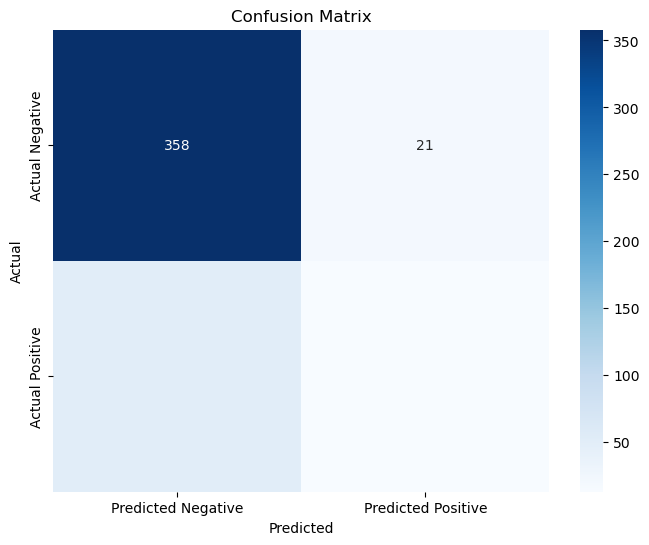

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
